# Diffraction

<style>
figure {
  border: 1px #cccccc solid;
  padding: 4px; 
  display: block;
  margin-left: auto;
  margin-right: auto;
}

figcaption {
  background-color: #eeeeee;
  color: black;
  padding: 2px;
}
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
from ipycanvas import MultiCanvas, hold_canvas,Canvas
import matplotlib as mpl
import matplotlib.cm as cm


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Huygens Principle

The Huygens principle states, that each point of a wavefront is the source of a spherical wave in forward direction. This means nothing else, that any wave can be expanded into a superposition of spherical waves, which is the fundamental of Mie scattering for example. Yet, the overall statement of this principle seems a bit unphysical. Classically, accelerated charges are the source of electromagnetic waves. If there is no accelerated charge, there is no wave. Yet, the Huygens principle is in accord with quantum field theory.  

<figure>
  <img src="img/huygens.png" width="40%" align="center">  
  <figcaption>**Fig.:** Huygens principle for a plane wave incident with a wave vector $\vec{k}$.
  </figcaption>
</figure>

The sketch above illustrates the Huygens principle, but we may also check that numerically. The graphs below were calculated to illustrate Huygens principle using spherical waves placed in a line close to each other.

<figure>
  <img src="img/huygens_num.png" width="100%" align="center">  
  <figcaption>**Fig.:** Huygens principle used to create a plane wave from a set of spherical waves. The graph on the left shows the amplitude of a single spherical wave of a wavelength $\lambda=532$ nm. If we arange 500 spherical wave sources along the x-direction very densely and they all are in phase since the represent the phase of the incident plane wave at $z=0$, we can recreate the plane wavefronts for $z>0$ (middle) and the constant intensity (right).
  </figcaption>
</figure>

We have already dealt with all of the mathematics describing this situation. We have earlier looked at the interference of multiple waves with the same amplitude. In this case we have $N$ spherical waves arranged along the x-axis at $z=0$ with neighboring sources at a distance $d$. If we consider the interference at infinite distance, the phase difference between the neighboring waves is given by $\Delta \phi=2\pi/\lambda d\sin(\theta)$, where $\theta$ is the angle with the z-direction. Thus all $N$ waves give according to our previous calculations an intensity pattern 

$$
I=I_0 \frac{\sin^2\left (N\frac{\pi}{\lambda}d\sin(\theta)\right)}{\sin^2\left (\frac{\pi}{\lambda}d\sin(\theta)\right)}
$$

This is again our starting point for the next calculations concernign a single slit, which confines the range of Huygens waves emitted to a region along the x-direction. This interference of Huygens waves is termed diffraction, yet the physical principle behind is interference. Our second calculation will have a look at many slits arranged along the x-direction, which is then called a diffraction grating. The latter is an indispensible tool for spectroscopy.

## Single Slit diffraction

We would like to apply this formula to study the diffraction of an incident plane wave (wavevector $k$) on a single slit of width $b$. Along this slit opening we place a number of Huygens sources. The sketch below has 3 Huygens sources. We may generalize that to $N$ sources.



<figure>
  <img src="img/single_slit.png" width="400px" align="center">  
  <figcaption>**Fig.:** 
  </figcaption>
</figure>

We will devide the slit into segments of width $\Delta b$ such that we have $N=b/\Delta b$ Huygens sources with an amplitude $A_0=\sqrt{I_0}$ along the slit. We may then apply the formula from teh previous section for the multi-wave interference using $d=\Delta b$. We obtain

$$
I=I_0 \frac{\sin^2\left (\pi\frac{b}{\lambda}\sin(\theta)\right)}{\sin^2\left (\pi\frac{\Delta b}{\lambda}\sin(\theta)\right)}
$$

where we can replace the $\Delta b$ in the denominator by $\Delta b=N/b$ to yield

$$
I=I_0 \frac{\sin^2\left (\pi\frac{b}{\lambda}\sin(\theta)\right)}{\sin^2\left (\pi\frac{b}{N\lambda}\sin(\theta)\right)}
$$

Substituting $x=\pi \frac{b}{\lambda}\sin(\theta)$

then gives

$$
I=I_0\frac{\sin^2(x)}{\sin^2(x/N)}
$$

Since we do not have a finite number $N$ sources in the slit, we have to consider the limit of the above formula for $N\rightarrow\infty$, which we have to calculate for the denominator.
There with increasing $N$ the argument of the sine function becomes very small and we can use our small angle expansion of the sine function to yield

$$
\sin^2\left (\frac{x}{N}\right) \approx \frac{x^2}{N^2}
$$

and therefore

$$
I(\theta)=I_s\frac{\sin^2\left (\pi \frac{b}{\lambda}\sin(\theta)\right)}{\left( \pi \frac{b}{\lambda}\sin(\theta)\right)^2}
$$

where $I_s=N^2I_0$. The function $sin(x)/x$ is often abbrevated as $\sinc(x)$, which is the sinus cardinalis. Let's have a look at some of the properties of the intensity distribution with the help of some python code.


In [54]:
def single_slit(d,theta,wl):
    #theta=np.arctan2(x,z)

    delta=np.pi*d/wl*np.sin(theta)
    return((np.sin(delta)/delta)**2)

In [55]:
wl=532e-9

theta=np.linspace(-np.pi/4,np.pi/4,1000)

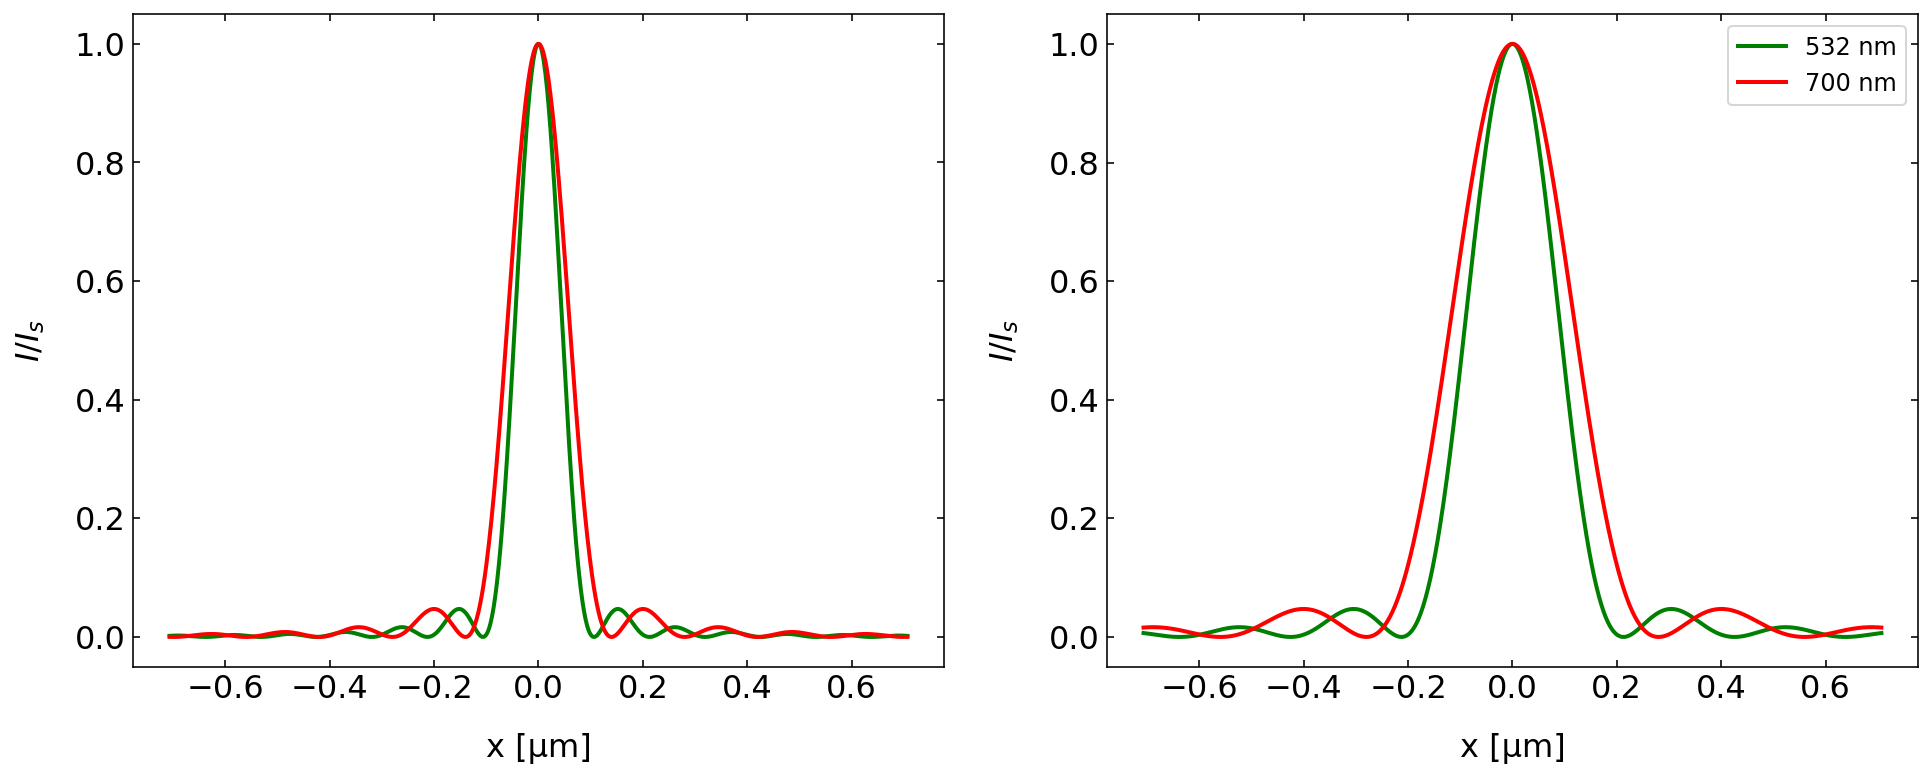

In [56]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(np.sin(theta),single_slit(5e-6,theta,532e-9),'green',lw=2,label="532 nm")
plt.plot(np.sin(theta),single_slit(5e-6,theta,700e-9),'red',lw=2,label="700 nm")
plt.xlabel('x [µm]')
plt.ylabel('$I/I_s$')
plt.subplot(1,2,2)
plt.plot(np.sin(theta),single_slit(2.5e-6,theta,532e-9),'green',lw=2,label="532 nm")
plt.plot(np.sin(theta),single_slit(2.5e-6,theta,700e-9),'red',lw=2,label="700 nm")
plt.xlabel('x [µm]')
plt.ylabel('$I/I_s$')
plt.legend()
plt.show()